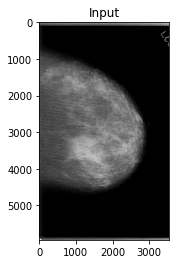

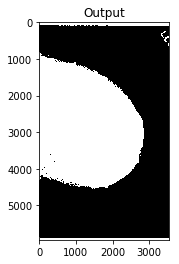

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the input image.
img = cv2.imread('/Users/sunying/Desktop/db3/full/jpg/0+Calc-Training_P_00012_LEFT_CC.jpg') # ImageSegmentation/DataInput/coins.jpg

# Convert image to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Display input image
plt.imshow(gray, 'gray')
plt.title('Input')
plt.show()

# Threshold using the opencv module, using otsus thresholding.
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Save the output image
cv2.imwrite("/Users/sunying/Desktop/result1.jpg", thresh)

plt.imshow(thresh, 'gray')
plt.title('Output')
plt.show()

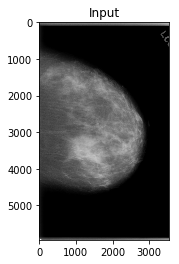

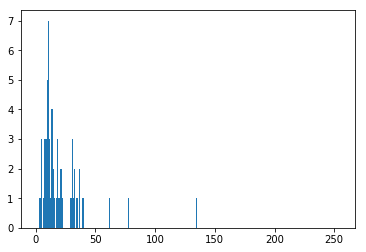

/Users/sunying/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars
/Users/sunying/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


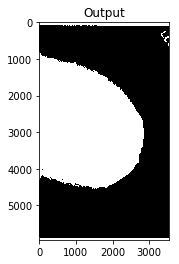

Threshold gotten by native implementation: 55
Threshold gotten by the OpenCV implementation: 55.0
Percentage error in calculation is 0.0 %


In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imag = cv2.imread('/Users/sunying/Desktop/db3/full/jpg/0+Calc-Training_P_00012_LEFT_CC.jpg',0)
blurred = cv2.GaussianBlur(imag,(5,5),0)

plt.imshow(blurred, 'gray')
plt.title('Input')
plt.show()

# find normalized_histogram, and its cumulative distribution function
# Returns 256*1 numpy matrix, each having the number of pixels with that value of intensity
histogram = cv2.calcHist([blurred],[0],None,[256],[0,256])

# Plot the normalized histogram
plt.hist(histogram, np.arange(256))
img = plt.gcf()
plt.show()
img.savefig('/Users/sunying/Desktop/0+Calc-Training_P_00012_LEFT_CC.jpg', dpi=100)

# print hist.shape
# print hist.max()

# Normalize this histogram from 0 to 1
hist_normalize = histogram.ravel()/histogram.max()

# print hist_norm.shape

# Find the cumulative distribution of the pixels wrt intensity
Q = hist_normalize.cumsum()
# print Q.shape

x_axis = np.arange(256)
mini = np.inf
thresh = -1
for i in range(1,256):
    # probabilities
    p1,p2 = np.hsplit(hist_normalize,[i])

    # cumulative sum of classes
    q1,q2 = Q[i],Q[255]-Q[i]

    # weights
    b1,b2 = np.hsplit(x_axis,[i])

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < mini:
        mini = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, binarized = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Save the output image
cv2.imwrite("../result/cars4_thresh.jpg", binarized)

plt.imshow(binarized, 'gray')
plt.title('Output')
plt.show()

print ("Threshold gotten by native implementation:",thresh)
print ("Threshold gotten by the OpenCV implementation:",ret)

print ("Percentage error in calculation is",abs(thresh-ret)/ret*100.0,"%")